<a href="https://colab.research.google.com/github/salvarafik08/quantinum_task1/blob/main/quantinum_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
259854  43324         47           47285    42730        68       Pringles Chicken    Salt Crips 134g         2       7.40
259855  43441         47           47285    42731        83         WW D/Style Chip     Sea Salt 200g         2       3.80
259856  43467         47           47306    42760        82     Smith Crinkle Cut   Mac N Cheese 150g         2       5.20
259857  43532         47           47312    42767        45    Smiths Thinly Cut   Roast Chicken 175g         2       6.00
259858  43484         47           47365    42854        25            Pringles SourCream  Onion 134g         2       7.40
259859  43582         47           47365    42855        99          Pringles Sthrn FriedChicken 134g         2       7.40
259860  43337         47           47370    42858        32      Kettle Sea Salt     And Vinegar 175g         2      10.80
259861  43319         47           47423    42931        32      Kettle Sea Salt     And

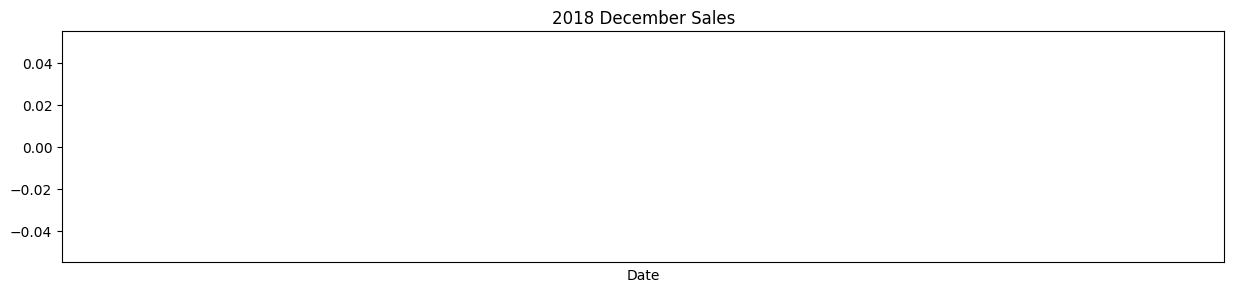

1.8542040107511636e-281


np.True_

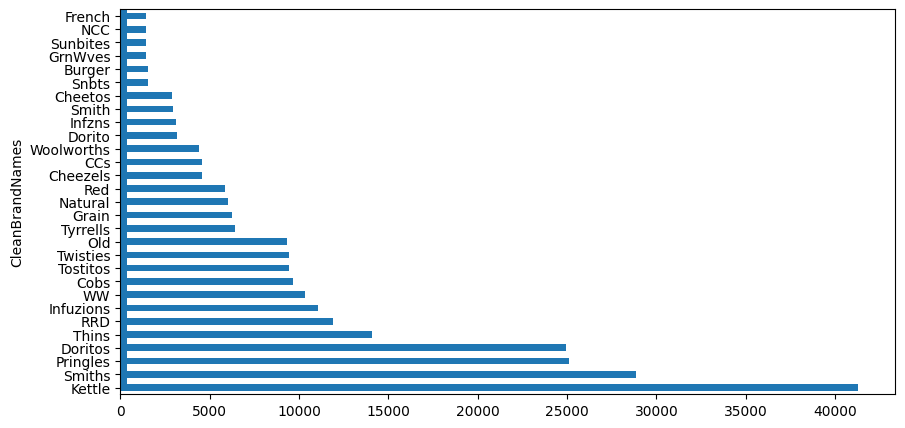

In [7]:
import pandas as pd

df = pd.read_csv('QVI_purchase_behaviour.csv')

print(df.to_string())

import pandas as pd

df = pd.read_excel('QVI_transaction_data.xlsx')

print(df.to_string())

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import re
import seaborn as sns
import plotly.express as px

from datetime import date

print(os.getcwd())


#importing two datasets
datab =pd.read_csv('QVI_purchase_behaviour.csv')

datat =pd.read_excel('QVI_transaction_data.xlsx')


#checking data
len(datab)
len(datat)

#checking coulmns names
datab.columns
datat.columns

#changing the column names
datab.columns=['LCardNumber','Lifestage','PCustomer']
datat.columns=['Date','StoreNumber','LCardNumber','TxnID','ProdNumber','ProdName','ProdQuality','TotalSales']

#Datatype of date was changed to Date in excel

#change datatype of date, ProdNumber,LCardNumber and TxnID
datat.Date = pd.to_datetime(datat.Date) #Using pd.to_datetime to convert to datetime objects
#datat.Date = datat.Date.astype('datetime64[ns]') #Or adding the [ns] unit to the astype calldatat.ProdNumber =datat.ProdNumber.astype('category')
datat.LCardNumber =datat.LCardNumber.astype('category')
datat.TxnID =datat.TxnID.astype('category')

#Products which are salsa are filtered and removed in excel
#merging two datasets
tdata=datat.set_index('LCardNumber').join(datab.set_index('LCardNumber'))
tdata=tdata.reset_index()
tdata=tdata.sort_values(by='Date').reset_index(drop='TRUE')

len(tdata)
tdata.columns
# to get info about the dataframe after merge

tdata.info()

#Products which are salsa are filtered and removed in excel
# spilt the weight from Product name and store in a new column Product weight
tdata['ProdWeight']=tdata['ProdName'].map(lambda x: float(''.join(re.findall(r'\d+', x))))

#to check the count of Product name
tdata['ProdName'].value_counts()

#to check all unique product names
tdata['ProdName'].unique()

#to find outliers
tdata['ProdQuality'].value_counts(bins=4).sort_index()

tdata['ProdQuality'].sort_values(ascending=False).head()

#to remove the to outliers

tdata=tdata[tdata['ProdQuality'] < 6]


#validating if outliers are removed
len(tdata[tdata["LCardNumber"] == 226000])

#to check if all 365 days are present in date
tdata['Date'].describe()

#to find the missing date
pd.date_range(start=tdata['Date'].min(), end=tdata['Date'].max()).difference(tdata['Date'])

#since its december 25th we can leave it moving to product



#to plot the graph dates
check_null_date = pd.merge(pd.Series(pd.date_range(start=tdata["Date"].min(), end=tdata["Date"].max()), name="Date"), tdata, on="Date", how="left")

trans_by_date = check_null_date["Date"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.Timestamp(2018,12,1)) & (trans_by_date.index < pd.Timestamp(2019,1,1))].sort_index() # Changed pd.datetime to pd.Timestamp
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

#to plot histogram for product weights
tdata['ProdWeight'].describe()
tdata['ProdWeight'].plot.hist()

#exploring Brand names
#spliting the product names and counting the values of first name and sorting it
tdata["ProdName"].str.split().str[0].value_counts().sort_index()
#transfer the first name of all products to a new column with clean brand names
tdata["CleanBrandNames"] = tdata["ProdName"].str.split().str[0]

#function to clean brand names
def clean_names(line):
    brand = line["CleanBrandNames"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

    tdata["CleanBrandNames"] = tdata.apply(lambda line: clean_names(line), axis=1)
tdata.head()

#bar graph to see the product counts
tdata['CleanBrandNames'].value_counts().plot.barh(figsize=(10,5))

#checking for null value
tdata.isnull().sum()

#saving the present data set for task 2

#tdata.to_csv('Task1.csv')

#Data exploration is now complete!
## Data analysis on customer segments

##Now that the data is ready for analysis, we can define some metrics of interest to the client:
#- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
#- How many customers are in each segment
#- How many chips are bought per customer by segment
#- What's the average chip price by customer segment

#grouped_sales = pd.DataFrame(tdata.groupby(["Lifestage", "PCustomer"])["TotalSales"].agg(["sum", "mean"]))
#grouped_sales.sort_values(ascending=False, by="sum")

#to find proportion of sales
byc = tdata.groupby(['Lifestage','PCustomer'])[['TotalSales']].sum().reset_index()
byc
fig = px.bar(byc,byc['Lifestage'],byc['TotalSales'],byc['PCustomer'],text=(byc['TotalSales']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Sales',title_x=0.5)

fig.show()
plt.savefig("Proportion of Sales.png", bbox_inches="tight")

#to find porportion of customers

byc1 = tdata.groupby(['Lifestage','PCustomer'])[['LCardNumber']].sum().reset_index()
byc1
fig = px.bar(byc1,byc1['Lifestage'],byc1['LCardNumber'],byc1['PCustomer'],text=(byc1['LCardNumber']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Customers',title_x=0.5)

fig.show()
plt.savefig("Proportion of Customers.png", bbox_inches="tight")

#to find unique customers
uniquecust = tdata[tdata['LCardNumber'].isin(list(pd.unique(tdata['LCardNumber'])))].copy()
byc2 = uniquecust.groupby(['Lifestage','PCustomer'])[['ProdQuality','LCardNumber']].sum().reset_index()
byc2['AVG'] = byc2['ProdQuality'] / byc2['LCardNumber']

fig = px.bar(byc2,byc2['Lifestage'],byc2['AVG'],byc2['PCustomer'])
# Change the bar mode
fig.update_layout(barmode='group',title='Average Units per customer',title_x=0.5)
fig.show()
plt.savefig("AVG units per cstomer.png", bbox_inches="tight")


#to find stats
from scipy.stats import ttest_ind
tdata['PricePerUnit'] = tdata['TotalSales'] / tdata['ProdQuality']
f1 = tdata[(tdata['Lifestage'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (tdata['PCustomer'] == 'Mainstream')]
f2 = tdata[(tdata['Lifestage'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (tdata['PCustomer'] != 'Mainstream')]
f2

import scipy.stats # Or import scipy
#... your existing code ...

#to find stats
from scipy.stats import ttest_ind
tdata['PricePerUnit'] = tdata['TotalSales'] / tdata['ProdQuality']
f1 = tdata[(tdata['Lifestage'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (tdata['PCustomer'] == 'Mainstream')]
f2 = tdata[(tdata['Lifestage'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (tdata['PCustomer'] != 'Mainstream')]
f2

scipy.stats.ttest_ind(f1['PricePerUnit'],f2['PricePerUnit']) #Now you can call scipy.stats.ttest_ind

#or stats
#... the rest of your existing code ...
#or stats

mainstream = tdata["PCustomer"] == "Mainstream"
young_midage = (tdata["Lifestage"] == "MIDAGE SINGLES/COUPLES") | (tdata["Lifestage"] == "YOUNG SINGLES/COUPLES")

budget_premium = (tdata["PCustomer"] == "Budget") | (tdata["PCustomer"] == "Premium")

a = tdata[young_midage & mainstream]["TotalSales"]
b = tdata[young_midage & budget_premium]["TotalSales"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001
